# Computer Vision : Sign Language Digit Recognizer 
# Transfer learning with VGG16 model

[Liens](https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/5097666-tp-implementez-votre-premier-reseau-de-neurones-avec-keras) 

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA


import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# Sign language digits dataset from Kaggle

Data available on [Kaggle](https://www.kaggle.com/ardamavi/sign-language-digits-dataset)

In [2]:

X = np.load('X.npy')
Y = np.load('Y.npy')

print(X.shape)
print(Y.shape)


(2062, 64, 64)
(2062, 10)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


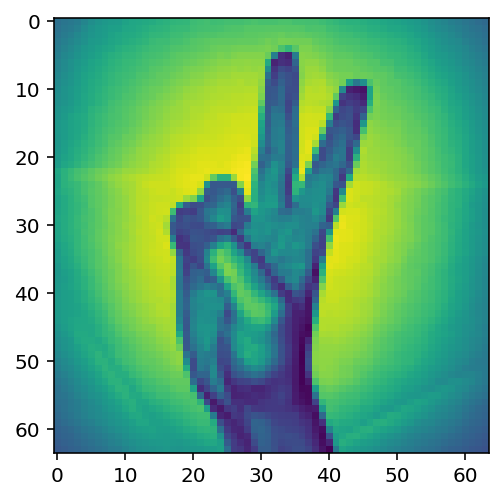

In [3]:
a = 1649
plt.imshow(X[a])
print(Y[a])

In [4]:
truc = Y[np.where(Y[:,4]==)]
truc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
truc = np.nonzero(Y[:,8]==1)
truc

(array([1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659,
        1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670,
        1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681,
        1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692,
        1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703,
        1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714,
        1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725,
        1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736,
        1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747,
        1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758,
        1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769,
        1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780,
        1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791,
        1792, 1793, 1794, 1795, 1796, 

In [6]:
#X_flat = np.array(X).reshape((2062, 64*64))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
#check image shape here
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1649, 64, 64)
(1649, 10)
(413, 64, 64)
(413, 10)


In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

#one-hot encode target column
X_train = np.broadcast_to(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))
X_test = np.broadcast_to(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))
print(X_train.shape)
print(X_test.shape)

(1649, 64, 64, 3)
(413, 64, 64, 3)


# Simple model with 1 Dense at the end

## Model VGG16

In [9]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

Using TensorFlow backend.


In [10]:
## Ne pas entraîner les 19 premières couches
for layers in (vggmodel.layers)[:19]:
    layers.trainable = False

In [11]:
new_X_train = vggmodel.predict(X_train)
new_X_test = vggmodel.predict(X_test)

In [12]:
new_X_train.shape


(1649, 2, 2, 512)

##  Additional model

In [13]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras import optimizers

model_final = Sequential()
model_final.add(Flatten(input_shape=(2, 2, 512)))
model_final.add(Dense(10, activation="softmax"))

In [14]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model_final.fit(x=new_X_train, y=y_train, epochs= 1000, validation_data= (new_X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1649 samples, validate on 413 samples
Epoch 1/1000
1649/1649 [==============================] - 0s 297us/step - loss: 2.4389 - acc: 0.0570 - val_loss: 2.3401 - val_acc: 0.1162
Epoch 2/1000
1649/1649 [==============================] - 0s 75us/step - loss: 2.2949 - acc: 0.1304 - val_loss: 2.2695 - val_acc: 0.1646
Epoch 3/1000
1649/1649 [==============================] - 0s 77us/step - loss: 2.2346 - acc: 0.1771 - val_loss: 2.2155 - val_acc: 0.2131
Epoch 4/1000
1649/1649 [==============================] - 0s 77us/step - loss: 2.1749 - acc: 0.2565 - val_loss: 2.1539 - val_acc: 0.2736
Epoch 5/1000
1649/1649 [==============================] - 0s 76us/step - loss: 2.1193 - acc: 0.2984 - val_loss: 2.1036 - val_acc: 0.3293
Epoch 6/1000
1649/1649 [==============================] - 0s 73us/step - loss: 2.0653 - acc: 0.3711 - val_loss: 2.0522 - val_acc: 0.3874
Epoch 7/1000
1649/1649 [==========

1649/1649 [==============================] - 0s 103us/step - loss: 1.0909 - acc: 0.7702 - val_loss: 1.1315 - val_acc: 0.7385
Epoch 55/1000
1649/1649 [==============================] - 0s 93us/step - loss: 1.0846 - acc: 0.7690 - val_loss: 1.1241 - val_acc: 0.7409
Epoch 56/1000
1649/1649 [==============================] - 0s 81us/step - loss: 1.0772 - acc: 0.7690 - val_loss: 1.1162 - val_acc: 0.7288
Epoch 57/1000
1649/1649 [==============================] - 0s 81us/step - loss: 1.0680 - acc: 0.7787 - val_loss: 1.1084 - val_acc: 0.7409
Epoch 58/1000
1649/1649 [==============================] - 0s 88us/step - loss: 1.0605 - acc: 0.7726 - val_loss: 1.1018 - val_acc: 0.7337
Epoch 59/1000
1649/1649 [==============================] - 0s 90us/step - loss: 1.0543 - acc: 0.7732 - val_loss: 1.0960 - val_acc: 0.7361
Epoch 60/1000
1649/1649 [==============================] - 0s 93us/step - loss: 1.0469 - acc: 0.7702 - val_loss: 1.0902 - val_acc: 0.7433
Epoch 61/1000
1649/1649 [======================

1649/1649 [==============================] - 0s 88us/step - loss: 0.8038 - acc: 0.8193 - val_loss: 0.8507 - val_acc: 0.7942
Epoch 114/1000
1649/1649 [==============================] - 0s 75us/step - loss: 0.8010 - acc: 0.8181 - val_loss: 0.8505 - val_acc: 0.7918
Epoch 115/1000
1649/1649 [==============================] - 0s 75us/step - loss: 0.7985 - acc: 0.8181 - val_loss: 0.8495 - val_acc: 0.7821
Epoch 116/1000
1649/1649 [==============================] - 0s 74us/step - loss: 0.7954 - acc: 0.8205 - val_loss: 0.8451 - val_acc: 0.7821
Epoch 117/1000
1649/1649 [==============================] - 0s 76us/step - loss: 0.7922 - acc: 0.8205 - val_loss: 0.8402 - val_acc: 0.7918
Epoch 118/1000
1649/1649 [==============================] - 0s 75us/step - loss: 0.7896 - acc: 0.8199 - val_loss: 0.8397 - val_acc: 0.7869
Epoch 119/1000
1649/1649 [==============================] - 0s 73us/step - loss: 0.7875 - acc: 0.8187 - val_loss: 0.8330 - val_acc: 0.7918
Epoch 120/1000
1649/1649 [================

Epoch 172/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.6705 - acc: 0.8429 - val_loss: 0.7192 - val_acc: 0.8184
Epoch 173/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.6688 - acc: 0.8514 - val_loss: 0.7200 - val_acc: 0.8136
Epoch 174/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.6672 - acc: 0.8423 - val_loss: 0.7167 - val_acc: 0.8160
Epoch 175/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.6654 - acc: 0.8484 - val_loss: 0.7177 - val_acc: 0.8160
Epoch 176/1000
1649/1649 [==============================] - 0s 77us/step - loss: 0.6633 - acc: 0.8472 - val_loss: 0.7136 - val_acc: 0.8257
Epoch 177/1000
1649/1649 [==============================] - 0s 72us/step - loss: 0.6628 - acc: 0.8514 - val_loss: 0.7100 - val_acc: 0.8232
Epoch 178/1000
1649/1649 [==============================] - 0s 66us/step - loss: 0.6611 - acc: 0.8496 - val_loss: 0.7113 - val_acc: 0.8208
Epoch 179/1000
1649/1649 [=

Epoch 231/1000
1649/1649 [==============================] - 0s 80us/step - loss: 0.5894 - acc: 0.8642 - val_loss: 0.6416 - val_acc: 0.8402
Epoch 232/1000
1649/1649 [==============================] - 0s 73us/step - loss: 0.5880 - acc: 0.8690 - val_loss: 0.6382 - val_acc: 0.8354
Epoch 233/1000
1649/1649 [==============================] - 0s 73us/step - loss: 0.5870 - acc: 0.8666 - val_loss: 0.6377 - val_acc: 0.8426
Epoch 234/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.5857 - acc: 0.8660 - val_loss: 0.6369 - val_acc: 0.8378
Epoch 235/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.5847 - acc: 0.8666 - val_loss: 0.6352 - val_acc: 0.8354
Epoch 236/1000
1649/1649 [==============================] - 0s 75us/step - loss: 0.5836 - acc: 0.8648 - val_loss: 0.6343 - val_acc: 0.8426
Epoch 237/1000
1649/1649 [==============================] - 0s 79us/step - loss: 0.5826 - acc: 0.8672 - val_loss: 0.6327 - val_acc: 0.8426
Epoch 238/1000
1649/1649 [=

Epoch 290/1000
1649/1649 [==============================] - 0s 95us/step - loss: 0.5327 - acc: 0.8769 - val_loss: 0.5846 - val_acc: 0.8571
Epoch 291/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.5319 - acc: 0.8781 - val_loss: 0.5823 - val_acc: 0.8644
Epoch 292/1000
1649/1649 [==============================] - 0s 79us/step - loss: 0.5314 - acc: 0.8787 - val_loss: 0.5822 - val_acc: 0.8668
Epoch 293/1000
1649/1649 [==============================] - 0s 83us/step - loss: 0.5304 - acc: 0.8817 - val_loss: 0.5818 - val_acc: 0.8644
Epoch 294/1000
1649/1649 [==============================] - 0s 96us/step - loss: 0.5300 - acc: 0.8799 - val_loss: 0.5794 - val_acc: 0.8692
Epoch 295/1000
1649/1649 [==============================] - 0s 100us/step - loss: 0.5292 - acc: 0.8757 - val_loss: 0.5814 - val_acc: 0.8596
Epoch 296/1000
1649/1649 [==============================] - 0s 94us/step - loss: 0.5277 - acc: 0.8824 - val_loss: 0.5785 - val_acc: 0.8668
Epoch 297/1000
1649/1649 [

1649/1649 [==============================] - 0s 91us/step - loss: 0.4913 - acc: 0.8848 - val_loss: 0.5422 - val_acc: 0.8717
Epoch 349/1000
1649/1649 [==============================] - 0s 74us/step - loss: 0.4910 - acc: 0.8854 - val_loss: 0.5410 - val_acc: 0.8717
Epoch 350/1000
1649/1649 [==============================] - 0s 72us/step - loss: 0.4903 - acc: 0.8878 - val_loss: 0.5424 - val_acc: 0.8741
Epoch 351/1000
1649/1649 [==============================] - 0s 71us/step - loss: 0.4899 - acc: 0.8842 - val_loss: 0.5401 - val_acc: 0.8717
Epoch 352/1000
1649/1649 [==============================] - 0s 72us/step - loss: 0.4893 - acc: 0.8866 - val_loss: 0.5397 - val_acc: 0.8717
Epoch 353/1000
1649/1649 [==============================] - 0s 73us/step - loss: 0.4887 - acc: 0.8878 - val_loss: 0.5392 - val_acc: 0.8717
Epoch 354/1000
1649/1649 [==============================] - 0s 74us/step - loss: 0.4876 - acc: 0.8854 - val_loss: 0.5396 - val_acc: 0.8717
Epoch 355/1000
1649/1649 [================

1649/1649 [==============================] - 0s 93us/step - loss: 0.4583 - acc: 0.8914 - val_loss: 0.5106 - val_acc: 0.8814
Epoch 408/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.4575 - acc: 0.8969 - val_loss: 0.5104 - val_acc: 0.8765
Epoch 409/1000
1649/1649 [==============================] - 0s 93us/step - loss: 0.4569 - acc: 0.8933 - val_loss: 0.5094 - val_acc: 0.8789
Epoch 410/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.4564 - acc: 0.8951 - val_loss: 0.5073 - val_acc: 0.8789
Epoch 411/1000
1649/1649 [==============================] - 0s 88us/step - loss: 0.4572 - acc: 0.8945 - val_loss: 0.5072 - val_acc: 0.8765
Epoch 412/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.4552 - acc: 0.8933 - val_loss: 0.5089 - val_acc: 0.8765
Epoch 413/1000
1649/1649 [==============================] - 0s 69us/step - loss: 0.4551 - acc: 0.8951 - val_loss: 0.5068 - val_acc: 0.8814
Epoch 414/1000
1649/1649 [================

1649/1649 [==============================] - 0s 86us/step - loss: 0.4310 - acc: 0.8999 - val_loss: 0.4843 - val_acc: 0.8862
Epoch 467/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.4303 - acc: 0.9018 - val_loss: 0.4841 - val_acc: 0.8838
Epoch 468/1000
1649/1649 [==============================] - 0s 86us/step - loss: 0.4301 - acc: 0.8987 - val_loss: 0.4837 - val_acc: 0.8862
Epoch 469/1000
1649/1649 [==============================] - 0s 79us/step - loss: 0.4294 - acc: 0.8993 - val_loss: 0.4836 - val_acc: 0.8862
Epoch 470/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.4292 - acc: 0.9042 - val_loss: 0.4829 - val_acc: 0.8862
Epoch 471/1000
1649/1649 [==============================] - 0s 102us/step - loss: 0.4286 - acc: 0.9018 - val_loss: 0.4826 - val_acc: 0.8862
Epoch 472/1000
1649/1649 [==============================] - 0s 92us/step - loss: 0.4283 - acc: 0.9018 - val_loss: 0.4811 - val_acc: 0.8862
Epoch 473/1000
1649/1649 [===============

1649/1649 [==============================] - 0s 92us/step - loss: 0.4085 - acc: 0.9072 - val_loss: 0.4608 - val_acc: 0.8862
Epoch 526/1000
1649/1649 [==============================] - 0s 69us/step - loss: 0.4076 - acc: 0.9066 - val_loss: 0.4616 - val_acc: 0.8862
Epoch 527/1000
1649/1649 [==============================] - 0s 70us/step - loss: 0.4069 - acc: 0.9072 - val_loss: 0.4599 - val_acc: 0.8862
Epoch 528/1000
1649/1649 [==============================] - 0s 76us/step - loss: 0.4073 - acc: 0.9024 - val_loss: 0.4592 - val_acc: 0.8886
Epoch 529/1000
1649/1649 [==============================] - 0s 77us/step - loss: 0.4066 - acc: 0.9066 - val_loss: 0.4613 - val_acc: 0.8862
Epoch 530/1000
1649/1649 [==============================] - 0s 76us/step - loss: 0.4058 - acc: 0.9030 - val_loss: 0.4593 - val_acc: 0.8838
Epoch 531/1000
1649/1649 [==============================] - 0s 77us/step - loss: 0.4054 - acc: 0.9078 - val_loss: 0.4610 - val_acc: 0.8862
Epoch 532/1000
1649/1649 [================

1649/1649 [==============================] - 0s 79us/step - loss: 0.3879 - acc: 0.9102 - val_loss: 0.4437 - val_acc: 0.8910
Epoch 585/1000
1649/1649 [==============================] - 0s 96us/step - loss: 0.3886 - acc: 0.9102 - val_loss: 0.4431 - val_acc: 0.8910
Epoch 586/1000
1649/1649 [==============================] - 0s 81us/step - loss: 0.3875 - acc: 0.9109 - val_loss: 0.4427 - val_acc: 0.8910
Epoch 587/1000
1649/1649 [==============================] - 0s 75us/step - loss: 0.3873 - acc: 0.9084 - val_loss: 0.4425 - val_acc: 0.8910
Epoch 588/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.3869 - acc: 0.9109 - val_loss: 0.4422 - val_acc: 0.8910
Epoch 589/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.3867 - acc: 0.9096 - val_loss: 0.4423 - val_acc: 0.8910
Epoch 590/1000
1649/1649 [==============================] - 0s 75us/step - loss: 0.3863 - acc: 0.9102 - val_loss: 0.4415 - val_acc: 0.8910
Epoch 591/1000
1649/1649 [================

1649/1649 [==============================] - 0s 89us/step - loss: 0.3714 - acc: 0.9127 - val_loss: 0.4267 - val_acc: 0.8910
Epoch 644/1000
1649/1649 [==============================] - 0s 95us/step - loss: 0.3710 - acc: 0.9139 - val_loss: 0.4266 - val_acc: 0.8910
Epoch 645/1000
1649/1649 [==============================] - 0s 81us/step - loss: 0.3706 - acc: 0.9145 - val_loss: 0.4269 - val_acc: 0.8910
Epoch 646/1000
1649/1649 [==============================] - 0s 74us/step - loss: 0.3703 - acc: 0.9121 - val_loss: 0.4266 - val_acc: 0.8910
Epoch 647/1000
1649/1649 [==============================] - 0s 68us/step - loss: 0.3706 - acc: 0.9151 - val_loss: 0.4262 - val_acc: 0.8910
Epoch 648/1000
1649/1649 [==============================] - 0s 66us/step - loss: 0.3700 - acc: 0.9145 - val_loss: 0.4271 - val_acc: 0.8910
Epoch 649/1000
1649/1649 [==============================] - 0s 71us/step - loss: 0.3702 - acc: 0.9145 - val_loss: 0.4258 - val_acc: 0.8910
Epoch 650/1000
1649/1649 [================

1649/1649 [==============================] - 0s 76us/step - loss: 0.3561 - acc: 0.9193 - val_loss: 0.4136 - val_acc: 0.8935
Epoch 703/1000
1649/1649 [==============================] - 0s 74us/step - loss: 0.3563 - acc: 0.9175 - val_loss: 0.4130 - val_acc: 0.8910
Epoch 704/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.3559 - acc: 0.9206 - val_loss: 0.4128 - val_acc: 0.8935
Epoch 705/1000
1649/1649 [==============================] - 0s 90us/step - loss: 0.3553 - acc: 0.9169 - val_loss: 0.4116 - val_acc: 0.8935
Epoch 706/1000
1649/1649 [==============================] - 0s 81us/step - loss: 0.3552 - acc: 0.9157 - val_loss: 0.4127 - val_acc: 0.8959
Epoch 707/1000
1649/1649 [==============================] - 0s 82us/step - loss: 0.3551 - acc: 0.9181 - val_loss: 0.4118 - val_acc: 0.8935
Epoch 708/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.3547 - acc: 0.9169 - val_loss: 0.4121 - val_acc: 0.8910
Epoch 709/1000
1649/1649 [================

Epoch 761/1000
1649/1649 [==============================] - 0s 98us/step - loss: 0.3428 - acc: 0.9224 - val_loss: 0.3995 - val_acc: 0.8983
Epoch 762/1000
1649/1649 [==============================] - 0s 93us/step - loss: 0.3431 - acc: 0.9193 - val_loss: 0.4009 - val_acc: 0.8935
Epoch 763/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.3428 - acc: 0.9224 - val_loss: 0.3986 - val_acc: 0.9007
Epoch 764/1000
1649/1649 [==============================] - 0s 84us/step - loss: 0.3428 - acc: 0.9206 - val_loss: 0.3993 - val_acc: 0.8935
Epoch 765/1000
1649/1649 [==============================] - 0s 81us/step - loss: 0.3419 - acc: 0.9224 - val_loss: 0.3995 - val_acc: 0.8935
Epoch 766/1000
1649/1649 [==============================] - 0s 97us/step - loss: 0.3418 - acc: 0.9236 - val_loss: 0.4001 - val_acc: 0.8910
Epoch 767/1000
1649/1649 [==============================] - 0s 86us/step - loss: 0.3415 - acc: 0.9193 - val_loss: 0.3991 - val_acc: 0.8983
Epoch 768/1000
1649/1649 [=

1649/1649 [==============================] - 0s 81us/step - loss: 0.3310 - acc: 0.9260 - val_loss: 0.3883 - val_acc: 0.9031
Epoch 820/1000
1649/1649 [==============================] - 0s 69us/step - loss: 0.3309 - acc: 0.9272 - val_loss: 0.3888 - val_acc: 0.8983
Epoch 821/1000
1649/1649 [==============================] - 0s 73us/step - loss: 0.3305 - acc: 0.9254 - val_loss: 0.3891 - val_acc: 0.8959
Epoch 822/1000
1649/1649 [==============================] - 0s 85us/step - loss: 0.3306 - acc: 0.9260 - val_loss: 0.3890 - val_acc: 0.8983
Epoch 823/1000
1649/1649 [==============================] - 0s 76us/step - loss: 0.3302 - acc: 0.9260 - val_loss: 0.3881 - val_acc: 0.9007
Epoch 824/1000
1649/1649 [==============================] - 0s 71us/step - loss: 0.3302 - acc: 0.9266 - val_loss: 0.3889 - val_acc: 0.8983
Epoch 825/1000
1649/1649 [==============================] - 0s 76us/step - loss: 0.3303 - acc: 0.9266 - val_loss: 0.3887 - val_acc: 0.9007
Epoch 826/1000
1649/1649 [================

1649/1649 [==============================] - 0s 99us/step - loss: 0.3200 - acc: 0.9297 - val_loss: 0.3801 - val_acc: 0.9007
Epoch 879/1000
1649/1649 [==============================] - 0s 79us/step - loss: 0.3199 - acc: 0.9290 - val_loss: 0.3790 - val_acc: 0.9031
Epoch 880/1000
1649/1649 [==============================] - 0s 97us/step - loss: 0.3200 - acc: 0.9284 - val_loss: 0.3788 - val_acc: 0.9056
Epoch 881/1000
1649/1649 [==============================] - 0s 88us/step - loss: 0.3196 - acc: 0.9278 - val_loss: 0.3769 - val_acc: 0.9007
Epoch 882/1000
1649/1649 [==============================] - 0s 87us/step - loss: 0.3196 - acc: 0.9290 - val_loss: 0.3781 - val_acc: 0.9031
Epoch 883/1000
1649/1649 [==============================] - 0s 74us/step - loss: 0.3191 - acc: 0.9290 - val_loss: 0.3775 - val_acc: 0.9056
Epoch 884/1000
1649/1649 [==============================] - 0s 76us/step - loss: 0.3193 - acc: 0.9327 - val_loss: 0.3775 - val_acc: 0.9007
Epoch 885/1000
1649/1649 [================

1649/1649 [==============================] - 0s 105us/step - loss: 0.3102 - acc: 0.9333 - val_loss: 0.3698 - val_acc: 0.9056
Epoch 938/1000
1649/1649 [==============================] - ETA: 0s - loss: 0.3051 - acc: 0.938 - 0s 79us/step - loss: 0.3098 - acc: 0.9345 - val_loss: 0.3699 - val_acc: 0.9031
Epoch 939/1000
1649/1649 [==============================] - 0s 81us/step - loss: 0.3101 - acc: 0.9303 - val_loss: 0.3694 - val_acc: 0.9031
Epoch 940/1000
1649/1649 [==============================] - 0s 85us/step - loss: 0.3095 - acc: 0.9327 - val_loss: 0.3687 - val_acc: 0.9031
Epoch 941/1000
1649/1649 [==============================] - 0s 76us/step - loss: 0.3092 - acc: 0.9333 - val_loss: 0.3708 - val_acc: 0.9007
Epoch 942/1000
1649/1649 [==============================] - 0s 76us/step - loss: 0.3092 - acc: 0.9333 - val_loss: 0.3700 - val_acc: 0.9007
Epoch 943/1000
1649/1649 [==============================] - 0s 78us/step - loss: 0.3089 - acc: 0.9315 - val_loss: 0.3691 - val_acc: 0.9056
Epo

1649/1649 [==============================] - 0s 96us/step - loss: 0.3009 - acc: 0.9375 - val_loss: 0.3632 - val_acc: 0.9007
Epoch 996/1000
1649/1649 [==============================] - 0s 101us/step - loss: 0.3010 - acc: 0.9327 - val_loss: 0.3601 - val_acc: 0.9031
Epoch 997/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.3007 - acc: 0.9345 - val_loss: 0.3602 - val_acc: 0.9031
Epoch 998/1000
1649/1649 [==============================] - 0s 103us/step - loss: 0.3004 - acc: 0.9345 - val_loss: 0.3617 - val_acc: 0.9031
Epoch 999/1000
1649/1649 [==============================] - 0s 87us/step - loss: 0.3003 - acc: 0.9339 - val_loss: 0.3612 - val_acc: 0.9031
Epoch 1000/1000
1649/1649 [==============================] - 0s 89us/step - loss: 0.3001 - acc: 0.9369 - val_loss: 0.3610 - val_acc: 0.9056


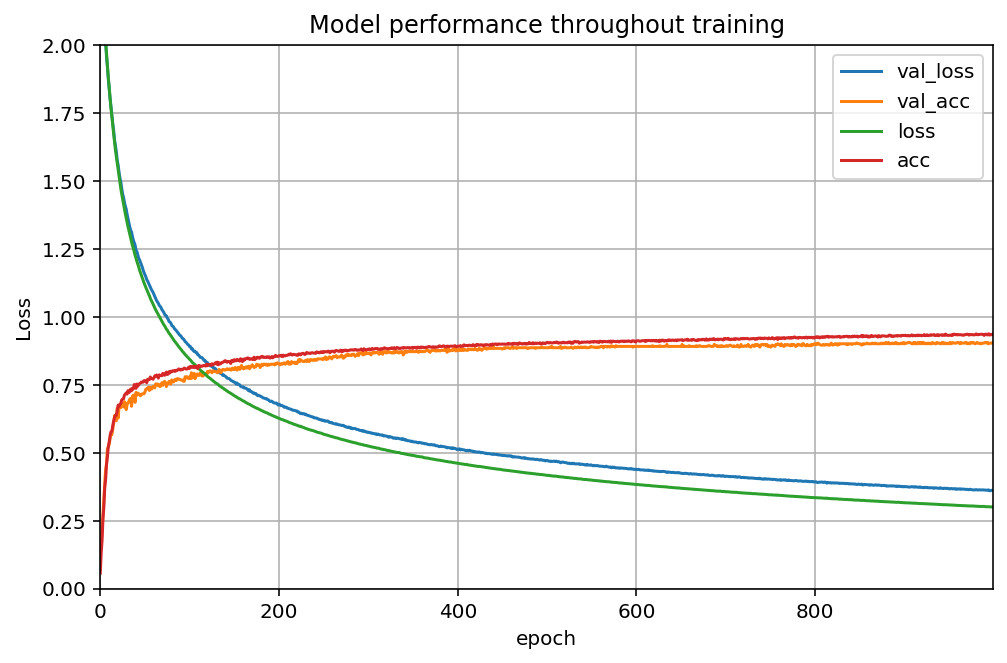

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylim(0,2)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Accuracy

In [17]:
y_predict = model_final.predict(new_X_train)
print(y_predict.shape)
print(y_train.shape)
y_predict

(1649, 10)
(1649, 10)


array([[3.5014819e-02, 3.5052240e-04, 2.1265712e-01, ..., 1.8616786e-02,
        6.1953748e-03, 1.2696278e-02],
       [4.8739542e-03, 3.9995401e-05, 4.3458567e-04, ..., 6.4986888e-03,
        2.8064767e-06, 9.8596317e-01],
       [3.2992945e-03, 7.0408067e-05, 9.6847042e-02, ..., 8.3762007e-03,
        2.3758737e-03, 1.3913983e-02],
       ...,
       [8.6567327e-02, 9.7080896e-04, 6.2059861e-01, ..., 1.0111060e-03,
        3.9625647e-03, 4.0446594e-03],
       [2.4001924e-03, 2.2501570e-04, 2.1013250e-03, ..., 1.1411697e-05,
        1.7455453e-03, 3.5042380e-04],
       [3.9839663e-04, 3.9249964e-05, 2.9334371e-04, ..., 6.6853436e-03,
        3.0216655e-02, 9.6512913e-06]], dtype=float32)

In [18]:
y_predict2 = np.argmax(y_predict, axis = 1)
y_predict2

array([5, 9, 6, ..., 2, 6, 4], dtype=int64)

In [19]:
from keras.utils import np_utils
y_predict3 =  np_utils.to_categorical(y_predict2, num_classes=10, dtype='float32')
y_predict3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_predict3.shape

(1649, 10)

In [21]:
accuracy_train = accuracy_score(y_train,y_predict3)
print(accuracy_train)

0.936931473620376


In [22]:
y_test_predict = model_final.predict(new_X_test)
y_test_predict = np.argmax(y_test_predict, axis = 1)
y_test_predict =  np_utils.to_categorical(y_test_predict, num_classes=10, dtype='float32')
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9055690072639225


## Prediction 

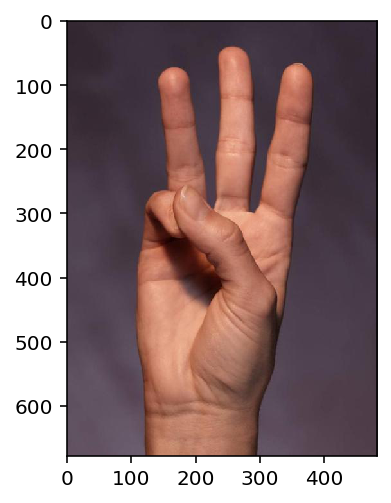

In [23]:
from keras.preprocessing import image
#img = image.load_img("prev1.jpg",target_size=(224,224))
img = image.load_img("prev2.jpg")
img = np.asarray(img)
plt.imshow(img)

In [24]:
img.shape

(678, 484, 3)

In [25]:
import cv2
img2 = cv2.imread('prev2.jpg')
img2  = cv2.resize(img2,dsize=(64,64))
img2.shape


(64, 64, 3)

In [26]:
img2 = img2.reshape(1,img2.shape[0],img2.shape[1],img2.shape[2])
img2_predict0 = vggmodel.predict(img2)
img2_predict = model_final.predict(img2_predict0)
# if output[0][0] > output[0][1]:
#    print("cat")
# else:
#    print('dog')

In [27]:
img2_predict = np.argmax(img2_predict, axis = 1)
img2_predict

array([0], dtype=int64)

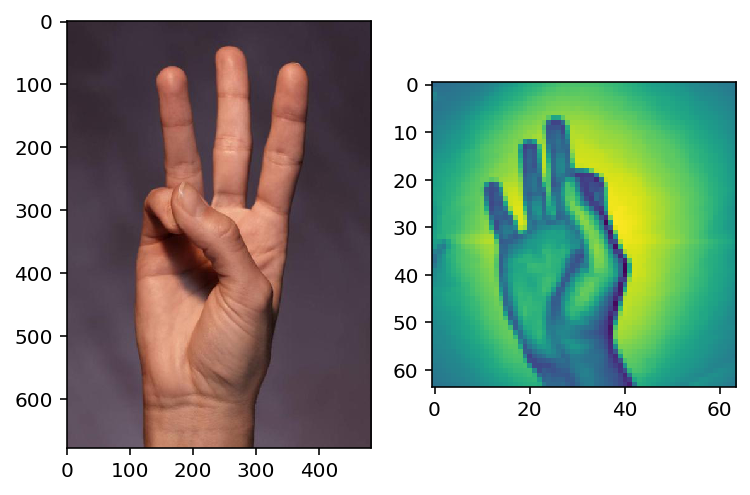

In [75]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[1].imshow(X[0])

# Simple model with 1 Dense + 1 dropout

In [55]:
new_X_train = vggmodel.predict(X_train)
new_X_test = vggmodel.predict(X_test)

## Additional model

In [56]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras import optimizers

model_final = Sequential()
model_final.add(Flatten(input_shape=(2, 2, 512)))
model_final.add(Dropout(0.5))
model_final.add(Dense(10, activation="softmax"))

In [57]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [66]:
from keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_acc', patience = 10, restore_best_weights = True)]
history = model_final.fit(x=new_X_train,
                          y=y_train, 
                          epochs= 1500, 
                          validation_data= (new_X_test, y_test),
                         callbacks=callbacks)

Train on 1649 samples, validate on 413 samples
Epoch 1/1500
1649/1649 [==============================] - 0s 122us/step - loss: 1.6557 - acc: 0.4676 - val_loss: 1.5640 - val_acc: 0.6392
Epoch 2/1500
1649/1649 [==============================] - 0s 109us/step - loss: 1.6254 - acc: 0.4985 - val_loss: 1.5505 - val_acc: 0.6174
Epoch 3/1500
1649/1649 [==============================] - 0s 109us/step - loss: 1.5966 - acc: 0.5112 - val_loss: 1.5231 - val_acc: 0.6392
Epoch 4/1500
1649/1649 [==============================] - 0s 113us/step - loss: 1.5889 - acc: 0.5076 - val_loss: 1.5070 - val_acc: 0.6029
Epoch 5/1500
1649/1649 [==============================] - 0s 99us/step - loss: 1.5772 - acc: 0.4918 - val_loss: 1.4855 - val_acc: 0.6247
Epoch 6/1500
1649/1649 [==============================] - 0s 92us/step - loss: 1.5445 - acc: 0.5155 - val_loss: 1.4718 - val_acc: 0.6586
Epoch 7/1500
1649/1649 [==============================] - 0s 94us/step - loss: 1.5369 - acc: 0.5143 - val_loss: 1.4523 - val_ac

Epoch 60/1500
1649/1649 [==============================] - 0s 86us/step - loss: 1.0612 - acc: 0.6925 - val_loss: 1.0036 - val_acc: 0.7579
Epoch 61/1500
1649/1649 [==============================] - 0s 86us/step - loss: 1.0697 - acc: 0.6780 - val_loss: 1.0001 - val_acc: 0.7603
Epoch 62/1500
1649/1649 [==============================] - 0s 87us/step - loss: 1.0587 - acc: 0.6871 - val_loss: 0.9937 - val_acc: 0.7530
Epoch 63/1500
1649/1649 [==============================] - 0s 86us/step - loss: 1.0569 - acc: 0.6938 - val_loss: 0.9958 - val_acc: 0.7312
Epoch 64/1500
1649/1649 [==============================] - 0s 104us/step - loss: 1.0644 - acc: 0.6847 - val_loss: 0.9876 - val_acc: 0.7482
Epoch 65/1500
1649/1649 [==============================] - 0s 94us/step - loss: 1.0519 - acc: 0.6883 - val_loss: 0.9842 - val_acc: 0.7627
Epoch 66/1500
1649/1649 [==============================] - 0s 87us/step - loss: 1.0558 - acc: 0.6931 - val_loss: 0.9802 - val_acc: 0.7506
Epoch 67/1500
1649/1649 [========

1649/1649 [==============================] - 0s 101us/step - loss: 0.8873 - acc: 0.7380 - val_loss: 0.8242 - val_acc: 0.7918
Epoch 120/1500
1649/1649 [==============================] - 0s 96us/step - loss: 0.8828 - acc: 0.7344 - val_loss: 0.8214 - val_acc: 0.8039
Epoch 121/1500
1649/1649 [==============================] - 0s 89us/step - loss: 0.8709 - acc: 0.7495 - val_loss: 0.8201 - val_acc: 0.7966
Epoch 122/1500
1649/1649 [==============================] - 0s 96us/step - loss: 0.8735 - acc: 0.7368 - val_loss: 0.8231 - val_acc: 0.7627
Epoch 123/1500
1649/1649 [==============================] - 0s 96us/step - loss: 0.8779 - acc: 0.7386 - val_loss: 0.8161 - val_acc: 0.7990
Epoch 124/1500
1649/1649 [==============================] - 0s 86us/step - loss: 0.8701 - acc: 0.7435 - val_loss: 0.8156 - val_acc: 0.7966
Epoch 125/1500
1649/1649 [==============================] - 0s 92us/step - loss: 0.8885 - acc: 0.7477 - val_loss: 0.8170 - val_acc: 0.7918
Epoch 126/1500
1649/1649 [===============

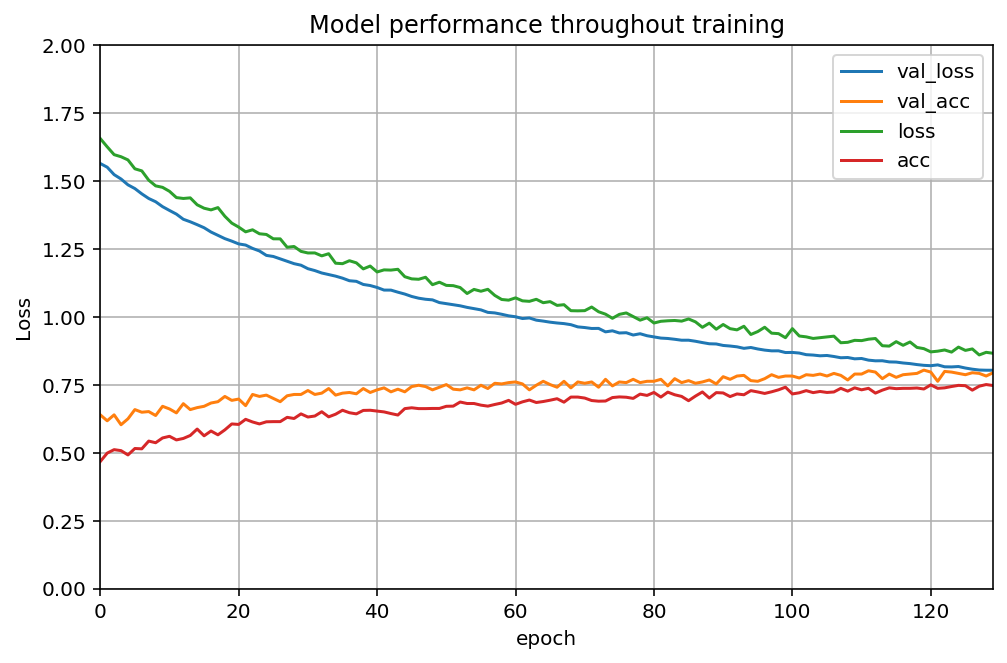

In [67]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylim(0,2)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Accuracy

In [68]:
y_train_predict = model_final.predict(new_X_train)
y_train_predict = np.argmax(y_train_predict, axis = 1)
y_train_predict =  np_utils.to_categorical(y_train_predict, num_classes=10, dtype='float32')
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.8223165554881746


In [69]:
y_test_predict = model_final.predict(new_X_test)
y_test_predict = np.argmax(y_test_predict, axis = 1)
y_test_predict =  np_utils.to_categorical(y_test_predict, num_classes=10, dtype='float32')
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.8038740920096852


## Prediction

In [70]:
import cv2
img2 = cv2.imread('prev1.jpg')
img2  = cv2.resize(img2,dsize=(64,64))
img2.shape

(64, 64, 3)

In [71]:
img2 = img2.reshape(1,img2.shape[0],img2.shape[1],img2.shape[2])
img2_predict0 = vggmodel.predict(img2)
img2_predict = model_final.predict(img2_predict0)

In [72]:
img2_predict = np.argmax(img2_predict, axis = 1)
img2_predict

array([8], dtype=int64)

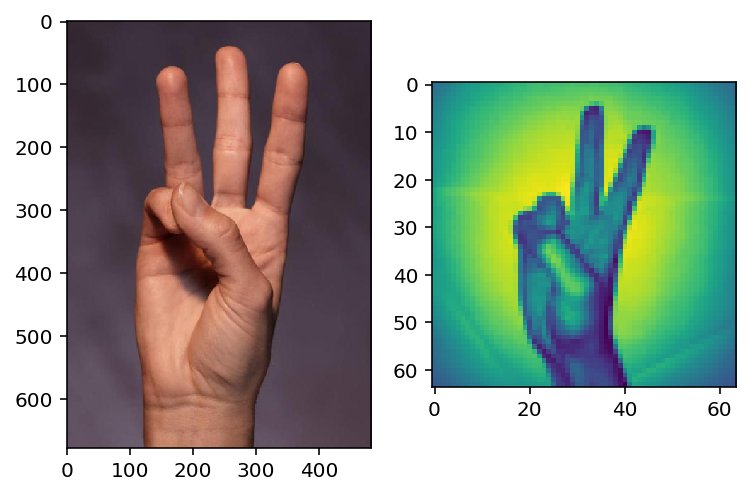

In [73]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[1].imshow(X[1649])

# Model with 2 Denses + 2 dropout

In [ ]:
new_X_train = vggmodel.predict(X_train)
new_X_test = vggmodel.predict(X_test)

## Additional model

In [33]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras import optimizers

model_final = Sequential()
model_final.add(Flatten(input_shape=(2, 2, 512)))

model_final.add(Dropout(0.25))
model_final.add(Dense(50, activation="relu"))

model_final.add(Dropout(0.25))
model_final.add(Dense(10, activation="softmax"))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                102450    
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 102,960
Trainable params: 102,960
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model_final.fit(x=new_X_train, y=y_train, epochs= 1000, validation_data= (new_X_test, y_test))

Train on 1649 samples, validate on 413 samples
Epoch 1/1500
1649/1649 [==============================] - 1s 432us/step - loss: 2.4131 - acc: 0.0910 - val_loss: 2.3093 - val_acc: 0.0775
Epoch 2/1500
1649/1649 [==============================] - 0s 127us/step - loss: 2.3219 - acc: 0.1001 - val_loss: 2.2856 - val_acc: 0.1404
Epoch 3/1500
1649/1649 [==============================] - 0s 124us/step - loss: 2.3010 - acc: 0.1225 - val_loss: 2.2590 - val_acc: 0.2107
Epoch 4/1500
1649/1649 [==============================] - 0s 113us/step - loss: 2.2775 - acc: 0.1255 - val_loss: 2.2361 - val_acc: 0.2470
Epoch 5/1500
1649/1649 [==============================] - 0s 114us/step - loss: 2.2660 - acc: 0.1389 - val_loss: 2.2135 - val_acc: 0.3245
Epoch 6/1500
1649/1649 [==============================] - 0s 119us/step - loss: 2.2331 - acc: 0.1674 - val_loss: 2.1838 - val_acc: 0.3390
Epoch 7/1500
1649/1649 [==============================] - 0s 113us/step - loss: 2.2181 - acc: 0.1734 - val_loss: 2.1499 - val

1649/1649 [==============================] - 0s 133us/step - loss: 1.3816 - acc: 0.5355 - val_loss: 1.2385 - val_acc: 0.6780
Epoch 60/1500
1649/1649 [==============================] - 0s 135us/step - loss: 1.3970 - acc: 0.5361 - val_loss: 1.2262 - val_acc: 0.6949
Epoch 61/1500
1649/1649 [==============================] - 0s 131us/step - loss: 1.3663 - acc: 0.5585 - val_loss: 1.2170 - val_acc: 0.6780
Epoch 62/1500
1649/1649 [==============================] - 0s 125us/step - loss: 1.3559 - acc: 0.5640 - val_loss: 1.2030 - val_acc: 0.6949
Epoch 63/1500
1649/1649 [==============================] - 0s 116us/step - loss: 1.3582 - acc: 0.5561 - val_loss: 1.1989 - val_acc: 0.6925
Epoch 64/1500
1649/1649 [==============================] - 0s 115us/step - loss: 1.3356 - acc: 0.5634 - val_loss: 1.1850 - val_acc: 0.6998
Epoch 65/1500
1649/1649 [==============================] - 0s 129us/step - loss: 1.3332 - acc: 0.5688 - val_loss: 1.1777 - val_acc: 0.6925
Epoch 66/1500
1649/1649 [================

1649/1649 [==============================] - 0s 113us/step - loss: 1.0312 - acc: 0.6592 - val_loss: 0.8568 - val_acc: 0.7869
Epoch 118/1500
1649/1649 [==============================] - 0s 112us/step - loss: 1.0130 - acc: 0.6701 - val_loss: 0.8476 - val_acc: 0.7966
Epoch 119/1500
1649/1649 [==============================] - 0s 105us/step - loss: 1.0144 - acc: 0.6683 - val_loss: 0.8403 - val_acc: 0.8015
Epoch 120/1500
1649/1649 [==============================] - 0s 102us/step - loss: 1.0237 - acc: 0.6653 - val_loss: 0.8406 - val_acc: 0.7845
Epoch 121/1500
1649/1649 [==============================] - 0s 113us/step - loss: 1.0065 - acc: 0.6743 - val_loss: 0.8303 - val_acc: 0.7966
Epoch 122/1500
1649/1649 [==============================] - 0s 107us/step - loss: 1.0294 - acc: 0.6616 - val_loss: 0.8352 - val_acc: 0.7845
Epoch 123/1500
1649/1649 [==============================] - 0s 104us/step - loss: 0.9929 - acc: 0.6689 - val_loss: 0.8301 - val_acc: 0.8039
Epoch 124/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 114us/step - loss: 0.8716 - acc: 0.7174 - val_loss: 0.6724 - val_acc: 0.8281
Epoch 176/1500
1649/1649 [==============================] - 0s 107us/step - loss: 0.8341 - acc: 0.7253 - val_loss: 0.6721 - val_acc: 0.8257
Epoch 177/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.8260 - acc: 0.7332 - val_loss: 0.6637 - val_acc: 0.8354
Epoch 178/1500
1649/1649 [==============================] - 0s 103us/step - loss: 0.8198 - acc: 0.7265 - val_loss: 0.6645 - val_acc: 0.8232
Epoch 179/1500
1649/1649 [==============================] - 0s 107us/step - loss: 0.8345 - acc: 0.7338 - val_loss: 0.6614 - val_acc: 0.8329
Epoch 180/1500
1649/1649 [==============================] - 0s 106us/step - loss: 0.8325 - acc: 0.7192 - val_loss: 0.6562 - val_acc: 0.8329
Epoch 181/1500
1649/1649 [==============================] - 0s 104us/step - loss: 0.8148 - acc: 0.7307 - val_loss: 0.6519 - val_acc: 0.8475
Epoch 182/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 119us/step - loss: 0.7347 - acc: 0.7574 - val_loss: 0.5692 - val_acc: 0.8450
Epoch 234/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.7282 - acc: 0.7629 - val_loss: 0.5646 - val_acc: 0.8547
Epoch 235/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.7166 - acc: 0.7568 - val_loss: 0.5590 - val_acc: 0.8644
Epoch 236/1500
1649/1649 [==============================] - 0s 114us/step - loss: 0.7205 - acc: 0.7550 - val_loss: 0.5594 - val_acc: 0.8475
Epoch 237/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.7520 - acc: 0.7502 - val_loss: 0.5607 - val_acc: 0.8523
Epoch 238/1500
1649/1649 [==============================] - 0s 114us/step - loss: 0.7511 - acc: 0.7447 - val_loss: 0.5620 - val_acc: 0.8475
Epoch 239/1500
1649/1649 [==============================] - 0s 114us/step - loss: 0.7148 - acc: 0.7696 - val_loss: 0.5625 - val_acc: 0.8426
Epoch 240/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 130us/step - loss: 0.6511 - acc: 0.7853 - val_loss: 0.5031 - val_acc: 0.8547
Epoch 292/1500
1649/1649 [==============================] - 0s 133us/step - loss: 0.6584 - acc: 0.7780 - val_loss: 0.5011 - val_acc: 0.8644
Epoch 293/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.6732 - acc: 0.7708 - val_loss: 0.4967 - val_acc: 0.8717
Epoch 294/1500
1649/1649 [==============================] - 0s 132us/step - loss: 0.6621 - acc: 0.7878 - val_loss: 0.5001 - val_acc: 0.8644
Epoch 295/1500
1649/1649 [==============================] - 0s 133us/step - loss: 0.6726 - acc: 0.7865 - val_loss: 0.4993 - val_acc: 0.8717
Epoch 296/1500
1649/1649 [==============================] - 0s 132us/step - loss: 0.6427 - acc: 0.7884 - val_loss: 0.4974 - val_acc: 0.8644
Epoch 297/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.6414 - acc: 0.7908 - val_loss: 0.4939 - val_acc: 0.8620
Epoch 298/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 127us/step - loss: 0.5984 - acc: 0.8102 - val_loss: 0.4559 - val_acc: 0.8838
Epoch 350/1500
1649/1649 [==============================] - 0s 131us/step - loss: 0.5983 - acc: 0.8053 - val_loss: 0.4507 - val_acc: 0.8838
Epoch 351/1500
1649/1649 [==============================] - 0s 129us/step - loss: 0.6054 - acc: 0.8035 - val_loss: 0.4510 - val_acc: 0.8814
Epoch 352/1500
1649/1649 [==============================] - 0s 128us/step - loss: 0.6212 - acc: 0.7847 - val_loss: 0.4539 - val_acc: 0.8862
Epoch 353/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.6047 - acc: 0.8059 - val_loss: 0.4521 - val_acc: 0.8814
Epoch 354/1500
1649/1649 [==============================] - 0s 136us/step - loss: 0.6020 - acc: 0.7968 - val_loss: 0.4528 - val_acc: 0.8692
Epoch 355/1500
1649/1649 [==============================] - 0s 124us/step - loss: 0.5841 - acc: 0.8053 - val_loss: 0.4503 - val_acc: 0.8862
Epoch 356/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 120us/step - loss: 0.5794 - acc: 0.8017 - val_loss: 0.4266 - val_acc: 0.8910
Epoch 408/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.5541 - acc: 0.8266 - val_loss: 0.4191 - val_acc: 0.8886
Epoch 409/1500
1649/1649 [==============================] - 0s 112us/step - loss: 0.5384 - acc: 0.8296 - val_loss: 0.4179 - val_acc: 0.8886
Epoch 410/1500
1649/1649 [==============================] - 0s 113us/step - loss: 0.5689 - acc: 0.8029 - val_loss: 0.4171 - val_acc: 0.8935
Epoch 411/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.5667 - acc: 0.8181 - val_loss: 0.4162 - val_acc: 0.8910
Epoch 412/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.5514 - acc: 0.8144 - val_loss: 0.4170 - val_acc: 0.8862
Epoch 413/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.5565 - acc: 0.8114 - val_loss: 0.4157 - val_acc: 0.8910
Epoch 414/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 137us/step - loss: 0.5216 - acc: 0.8241 - val_loss: 0.3900 - val_acc: 0.8910
Epoch 466/1500
1649/1649 [==============================] - 0s 133us/step - loss: 0.5243 - acc: 0.8253 - val_loss: 0.3932 - val_acc: 0.8935
Epoch 467/1500
1649/1649 [==============================] - 0s 140us/step - loss: 0.5350 - acc: 0.8241 - val_loss: 0.3895 - val_acc: 0.8983
Epoch 468/1500
1649/1649 [==============================] - 0s 124us/step - loss: 0.5334 - acc: 0.8260 - val_loss: 0.3897 - val_acc: 0.8959
Epoch 469/1500
1649/1649 [==============================] - 0s 120us/step - loss: 0.5179 - acc: 0.8272 - val_loss: 0.3885 - val_acc: 0.8959
Epoch 470/1500
1649/1649 [==============================] - 0s 126us/step - loss: 0.5350 - acc: 0.8193 - val_loss: 0.3904 - val_acc: 0.8959
Epoch 471/1500
1649/1649 [==============================] - 0s 128us/step - loss: 0.5380 - acc: 0.8211 - val_loss: 0.3911 - val_acc: 0.8959
Epoch 472/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 130us/step - loss: 0.5159 - acc: 0.8260 - val_loss: 0.3697 - val_acc: 0.8935
Epoch 524/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.4779 - acc: 0.8405 - val_loss: 0.3694 - val_acc: 0.8983
Epoch 525/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.4904 - acc: 0.8411 - val_loss: 0.3658 - val_acc: 0.9007
Epoch 526/1500
1649/1649 [==============================] - 0s 125us/step - loss: 0.5035 - acc: 0.8272 - val_loss: 0.3655 - val_acc: 0.9007
Epoch 527/1500
1649/1649 [==============================] - 0s 193us/step - loss: 0.4965 - acc: 0.8351 - val_loss: 0.3692 - val_acc: 0.9031
Epoch 528/1500
1649/1649 [==============================] - 0s 136us/step - loss: 0.4999 - acc: 0.8241 - val_loss: 0.3651 - val_acc: 0.9007
Epoch 529/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.4917 - acc: 0.8429 - val_loss: 0.3696 - val_acc: 0.8983
Epoch 530/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 119us/step - loss: 0.4868 - acc: 0.8435 - val_loss: 0.3521 - val_acc: 0.8959
Epoch 582/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.4664 - acc: 0.8405 - val_loss: 0.3510 - val_acc: 0.8935
Epoch 583/1500
1649/1649 [==============================] - 0s 124us/step - loss: 0.4898 - acc: 0.8175 - val_loss: 0.3512 - val_acc: 0.9031
Epoch 584/1500
1649/1649 [==============================] - 0s 142us/step - loss: 0.4859 - acc: 0.8375 - val_loss: 0.3520 - val_acc: 0.9007
Epoch 585/1500
1649/1649 [==============================] - 0s 159us/step - loss: 0.4643 - acc: 0.8454 - val_loss: 0.3513 - val_acc: 0.8983
Epoch 586/1500
1649/1649 [==============================] - 0s 130us/step - loss: 0.4679 - acc: 0.8569 - val_loss: 0.3514 - val_acc: 0.9031
Epoch 587/1500
1649/1649 [==============================] - 0s 135us/step - loss: 0.4454 - acc: 0.8539 - val_loss: 0.3491 - val_acc: 0.9031
Epoch 588/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 126us/step - loss: 0.4433 - acc: 0.8599 - val_loss: 0.3331 - val_acc: 0.9056
Epoch 640/1500
1649/1649 [==============================] - 0s 147us/step - loss: 0.4423 - acc: 0.8563 - val_loss: 0.3369 - val_acc: 0.9056
Epoch 641/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.4527 - acc: 0.8484 - val_loss: 0.3319 - val_acc: 0.9031
Epoch 642/1500
1649/1649 [==============================] - 0s 120us/step - loss: 0.4538 - acc: 0.8435 - val_loss: 0.3338 - val_acc: 0.9056
Epoch 643/1500
1649/1649 [==============================] - 0s 124us/step - loss: 0.4608 - acc: 0.8344 - val_loss: 0.3380 - val_acc: 0.9007
Epoch 644/1500
1649/1649 [==============================] - 0s 132us/step - loss: 0.4525 - acc: 0.8496 - val_loss: 0.3352 - val_acc: 0.9080
Epoch 645/1500
1649/1649 [==============================] - 0s 135us/step - loss: 0.4472 - acc: 0.8502 - val_loss: 0.3365 - val_acc: 0.9031
Epoch 646/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 119us/step - loss: 0.4473 - acc: 0.8441 - val_loss: 0.3239 - val_acc: 0.9031
Epoch 698/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.4199 - acc: 0.8617 - val_loss: 0.3241 - val_acc: 0.9104
Epoch 699/1500
1649/1649 [==============================] - 0s 135us/step - loss: 0.4339 - acc: 0.8526 - val_loss: 0.3204 - val_acc: 0.9080
Epoch 700/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.4411 - acc: 0.8545 - val_loss: 0.3228 - val_acc: 0.9080
Epoch 701/1500
1649/1649 [==============================] - 0s 138us/step - loss: 0.4338 - acc: 0.8593 - val_loss: 0.3237 - val_acc: 0.9080
Epoch 702/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.4225 - acc: 0.8508 - val_loss: 0.3229 - val_acc: 0.9080
Epoch 703/1500
1649/1649 [==============================] - 0s 124us/step - loss: 0.4339 - acc: 0.8520 - val_loss: 0.3228 - val_acc: 0.9080
Epoch 704/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 121us/step - loss: 0.4231 - acc: 0.8666 - val_loss: 0.3137 - val_acc: 0.9104
Epoch 756/1500
1649/1649 [==============================] - 0s 117us/step - loss: 0.4266 - acc: 0.8666 - val_loss: 0.3113 - val_acc: 0.9128
Epoch 757/1500
1649/1649 [==============================] - 0s 124us/step - loss: 0.3992 - acc: 0.8708 - val_loss: 0.3106 - val_acc: 0.9128
Epoch 758/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.4206 - acc: 0.8545 - val_loss: 0.3091 - val_acc: 0.9128
Epoch 759/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.4019 - acc: 0.8684 - val_loss: 0.3119 - val_acc: 0.9153
Epoch 760/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.4356 - acc: 0.8514 - val_loss: 0.3124 - val_acc: 0.9177
Epoch 761/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.4143 - acc: 0.8702 - val_loss: 0.3105 - val_acc: 0.9080
Epoch 762/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 129us/step - loss: 0.4110 - acc: 0.8648 - val_loss: 0.3024 - val_acc: 0.9153
Epoch 814/1500
1649/1649 [==============================] - 0s 131us/step - loss: 0.3990 - acc: 0.8775 - val_loss: 0.3005 - val_acc: 0.9201
Epoch 815/1500
1649/1649 [==============================] - 0s 130us/step - loss: 0.4077 - acc: 0.8672 - val_loss: 0.3008 - val_acc: 0.9104
Epoch 816/1500
1649/1649 [==============================] - 0s 120us/step - loss: 0.4304 - acc: 0.8435 - val_loss: 0.3041 - val_acc: 0.9177
Epoch 817/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.3994 - acc: 0.8666 - val_loss: 0.3059 - val_acc: 0.9153
Epoch 818/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3873 - acc: 0.8781 - val_loss: 0.3051 - val_acc: 0.9056
Epoch 819/1500
1649/1649 [==============================] - 0s 125us/step - loss: 0.4030 - acc: 0.8539 - val_loss: 0.3007 - val_acc: 0.9201
Epoch 820/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 126us/step - loss: 0.3797 - acc: 0.8696 - val_loss: 0.2939 - val_acc: 0.9177
Epoch 872/1500
1649/1649 [==============================] - 0s 124us/step - loss: 0.3749 - acc: 0.8739 - val_loss: 0.2922 - val_acc: 0.9153
Epoch 873/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.3865 - acc: 0.8696 - val_loss: 0.2906 - val_acc: 0.9104
Epoch 874/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.3833 - acc: 0.8775 - val_loss: 0.2929 - val_acc: 0.9177
Epoch 875/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.4001 - acc: 0.8696 - val_loss: 0.2965 - val_acc: 0.9177
Epoch 876/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.4050 - acc: 0.8648 - val_loss: 0.2945 - val_acc: 0.9104
Epoch 877/1500
1649/1649 [==============================] - 0s 119us/step - loss: 0.3935 - acc: 0.8642 - val_loss: 0.2955 - val_acc: 0.9128
Epoch 878/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 117us/step - loss: 0.3917 - acc: 0.8739 - val_loss: 0.2857 - val_acc: 0.9201
Epoch 930/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.3688 - acc: 0.8787 - val_loss: 0.2861 - val_acc: 0.9128
Epoch 931/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3714 - acc: 0.8824 - val_loss: 0.2863 - val_acc: 0.9177
Epoch 932/1500
1649/1649 [==============================] - 0s 117us/step - loss: 0.3769 - acc: 0.8727 - val_loss: 0.2835 - val_acc: 0.9225
Epoch 933/1500
1649/1649 [==============================] - 0s 130us/step - loss: 0.3743 - acc: 0.8708 - val_loss: 0.2861 - val_acc: 0.9201
Epoch 934/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.3840 - acc: 0.8696 - val_loss: 0.2818 - val_acc: 0.9153
Epoch 935/1500
1649/1649 [==============================] - 0s 114us/step - loss: 0.3794 - acc: 0.8799 - val_loss: 0.2831 - val_acc: 0.9201
Epoch 936/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 127us/step - loss: 0.3652 - acc: 0.8702 - val_loss: 0.2760 - val_acc: 0.9177
Epoch 988/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.3684 - acc: 0.8805 - val_loss: 0.2807 - val_acc: 0.9225
Epoch 989/1500
1649/1649 [==============================] - 0s 117us/step - loss: 0.3680 - acc: 0.8836 - val_loss: 0.2780 - val_acc: 0.9201
Epoch 990/1500
1649/1649 [==============================] - 0s 118us/step - loss: 0.3474 - acc: 0.8842 - val_loss: 0.2773 - val_acc: 0.9177
Epoch 991/1500
1649/1649 [==============================] - 0s 120us/step - loss: 0.3700 - acc: 0.8708 - val_loss: 0.2783 - val_acc: 0.9153
Epoch 992/1500
1649/1649 [==============================] - 0s 123us/step - loss: 0.3783 - acc: 0.8696 - val_loss: 0.2778 - val_acc: 0.9201
Epoch 993/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.3573 - acc: 0.8902 - val_loss: 0.2796 - val_acc: 0.9153
Epoch 994/1500
1649/1649 [=========

1649/1649 [==============================] - 0s 135us/step - loss: 0.3527 - acc: 0.8811 - val_loss: 0.2714 - val_acc: 0.9225
Epoch 1046/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3539 - acc: 0.8872 - val_loss: 0.2678 - val_acc: 0.9201
Epoch 1047/1500
1649/1649 [==============================] - 0s 116us/step - loss: 0.3744 - acc: 0.8684 - val_loss: 0.2714 - val_acc: 0.9249
Epoch 1048/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3522 - acc: 0.8811 - val_loss: 0.2687 - val_acc: 0.9177
Epoch 1049/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.3818 - acc: 0.8714 - val_loss: 0.2749 - val_acc: 0.9177
Epoch 1050/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.3776 - acc: 0.8696 - val_loss: 0.2720 - val_acc: 0.9249
Epoch 1051/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3705 - acc: 0.8708 - val_loss: 0.2696 - val_acc: 0.9201
Epoch 1052/1500
1649/1649 [==

1649/1649 [==============================] - 0s 124us/step - loss: 0.3543 - acc: 0.8781 - val_loss: 0.2639 - val_acc: 0.9201
Epoch 1104/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.3528 - acc: 0.8878 - val_loss: 0.2648 - val_acc: 0.9225
Epoch 1105/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.3633 - acc: 0.8727 - val_loss: 0.2647 - val_acc: 0.9201
Epoch 1106/1500
1649/1649 [==============================] - 0s 126us/step - loss: 0.3575 - acc: 0.8672 - val_loss: 0.2652 - val_acc: 0.9249
Epoch 1107/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3398 - acc: 0.8921 - val_loss: 0.2649 - val_acc: 0.9201
Epoch 1108/1500
1649/1649 [==============================] - 0s 115us/step - loss: 0.3538 - acc: 0.8757 - val_loss: 0.2622 - val_acc: 0.9177
Epoch 1109/1500
1649/1649 [==============================] - 0s 130us/step - loss: 0.3506 - acc: 0.8787 - val_loss: 0.2643 - val_acc: 0.9249
Epoch 1110/1500
1649/1649 [==

1649/1649 [==============================] - 0s 117us/step - loss: 0.3390 - acc: 0.8939 - val_loss: 0.2598 - val_acc: 0.9249
Epoch 1162/1500
1649/1649 [==============================] - 0s 129us/step - loss: 0.3332 - acc: 0.8939 - val_loss: 0.2593 - val_acc: 0.9201
Epoch 1163/1500
1649/1649 [==============================] - 0s 122us/step - loss: 0.3526 - acc: 0.8830 - val_loss: 0.2592 - val_acc: 0.9249
Epoch 1164/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3445 - acc: 0.8890 - val_loss: 0.2570 - val_acc: 0.9225
Epoch 1165/1500
1649/1649 [==============================] - 0s 109us/step - loss: 0.3337 - acc: 0.8805 - val_loss: 0.2594 - val_acc: 0.9177
Epoch 1166/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.3336 - acc: 0.8993 - val_loss: 0.2588 - val_acc: 0.9249
Epoch 1167/1500
1649/1649 [==============================] - 0s 130us/step - loss: 0.3464 - acc: 0.8805 - val_loss: 0.2586 - val_acc: 0.9201
Epoch 1168/1500
1649/1649 [==

1649/1649 [==============================] - 0s 119us/step - loss: 0.3484 - acc: 0.8787 - val_loss: 0.2545 - val_acc: 0.9201
Epoch 1220/1500
1649/1649 [==============================] - 0s 121us/step - loss: 0.3429 - acc: 0.8872 - val_loss: 0.2554 - val_acc: 0.9201
Epoch 1221/1500
1649/1649 [==============================] - 0s 127us/step - loss: 0.3195 - acc: 0.8884 - val_loss: 0.2541 - val_acc: 0.9225
Epoch 1222/1500
1649/1649 [==============================] - 0s 139us/step - loss: 0.3470 - acc: 0.8896 - val_loss: 0.2545 - val_acc: 0.9225
Epoch 1223/1500
1649/1649 [==============================] - 0s 144us/step - loss: 0.3533 - acc: 0.8824 - val_loss: 0.2545 - val_acc: 0.9225
Epoch 1224/1500
1649/1649 [==============================] - 0s 146us/step - loss: 0.3318 - acc: 0.8951 - val_loss: 0.2554 - val_acc: 0.9201
Epoch 1225/1500
1649/1649 [==============================] - 0s 135us/step - loss: 0.3358 - acc: 0.8854 - val_loss: 0.2558 - val_acc: 0.9201
Epoch 1226/1500
1649/1649 [==

1649/1649 [==============================] - 1s 393us/step - loss: 0.3317 - acc: 0.8921 - val_loss: 0.2483 - val_acc: 0.9225
Epoch 1278/1500
1649/1649 [==============================] - 0s 223us/step - loss: 0.3168 - acc: 0.8981 - val_loss: 0.2482 - val_acc: 0.9249
Epoch 1279/1500
1649/1649 [==============================] - 1s 381us/step - loss: 0.3236 - acc: 0.8939 - val_loss: 0.2467 - val_acc: 0.9249
Epoch 1280/1500
1649/1649 [==============================] - 1s 318us/step - loss: 0.3335 - acc: 0.8902 - val_loss: 0.2509 - val_acc: 0.9225
Epoch 1281/1500
1649/1649 [==============================] - 1s 362us/step - loss: 0.3238 - acc: 0.8890 - val_loss: 0.2507 - val_acc: 0.9249
Epoch 1282/1500
1649/1649 [==============================] - 1s 360us/step - loss: 0.3174 - acc: 0.8908 - val_loss: 0.2472 - val_acc: 0.9225
Epoch 1283/1500
1649/1649 [==============================] - 0s 275us/step - loss: 0.3173 - acc: 0.8939 - val_loss: 0.2451 - val_acc: 0.9274
Epoch 1284/1500
1649/1649 [==

1649/1649 [==============================] - 1s 363us/step - loss: 0.3138 - acc: 0.8927 - val_loss: 0.2444 - val_acc: 0.9225
Epoch 1336/1500
1649/1649 [==============================] - 1s 312us/step - loss: 0.3060 - acc: 0.9090 - val_loss: 0.2459 - val_acc: 0.9201
Epoch 1337/1500
1649/1649 [==============================] - 0s 146us/step - loss: 0.3198 - acc: 0.8908 - val_loss: 0.2443 - val_acc: 0.9225
Epoch 1338/1500
1649/1649 [==============================] - 0s 151us/step - loss: 0.3176 - acc: 0.8945 - val_loss: 0.2430 - val_acc: 0.9225
Epoch 1339/1500
1649/1649 [==============================] - 0s 164us/step - loss: 0.3347 - acc: 0.8860 - val_loss: 0.2438 - val_acc: 0.9201
Epoch 1340/1500
1649/1649 [==============================] - 0s 174us/step - loss: 0.2986 - acc: 0.9096 - val_loss: 0.2438 - val_acc: 0.9249
Epoch 1341/1500
1649/1649 [==============================] - 0s 147us/step - loss: 0.3145 - acc: 0.8963 - val_loss: 0.2431 - val_acc: 0.9249
Epoch 1342/1500
1649/1649 [==

Epoch 1393/1500
1649/1649 [==============================] - 1s 324us/step - loss: 0.3086 - acc: 0.9012 - val_loss: 0.2420 - val_acc: 0.9201
Epoch 1394/1500
1649/1649 [==============================] - 1s 397us/step - loss: 0.3273 - acc: 0.8921 - val_loss: 0.2394 - val_acc: 0.9225
Epoch 1395/1500
1649/1649 [==============================] - 1s 418us/step - loss: 0.2954 - acc: 0.9060 - val_loss: 0.2370 - val_acc: 0.9249
Epoch 1396/1500
1649/1649 [==============================] - 1s 378us/step - loss: 0.3084 - acc: 0.8963 - val_loss: 0.2381 - val_acc: 0.9201
Epoch 1397/1500
1649/1649 [==============================] - 1s 306us/step - loss: 0.2966 - acc: 0.9078 - val_loss: 0.2373 - val_acc: 0.9225
Epoch 1398/1500
1649/1649 [==============================] - 0s 283us/step - loss: 0.3187 - acc: 0.8957 - val_loss: 0.2399 - val_acc: 0.9225
Epoch 1399/1500
1649/1649 [==============================] - 0s 295us/step - loss: 0.3324 - acc: 0.8939 - val_loss: 0.2425 - val_acc: 0.9201
Epoch 1400/15

1649/1649 [==============================] - 0s 191us/step - loss: 0.3278 - acc: 0.8830 - val_loss: 0.2395 - val_acc: 0.9249
Epoch 1451/1500
1649/1649 [==============================] - 0s 167us/step - loss: 0.3109 - acc: 0.8975 - val_loss: 0.2389 - val_acc: 0.9201
Epoch 1452/1500
1649/1649 [==============================] - 0s 165us/step - loss: 0.3088 - acc: 0.8902 - val_loss: 0.2374 - val_acc: 0.9225
Epoch 1453/1500
1649/1649 [==============================] - 0s 178us/step - loss: 0.3158 - acc: 0.8908 - val_loss: 0.2393 - val_acc: 0.9201
Epoch 1454/1500
1649/1649 [==============================] - 0s 193us/step - loss: 0.3312 - acc: 0.8799 - val_loss: 0.2397 - val_acc: 0.9225
Epoch 1455/1500
1649/1649 [==============================] - 0s 165us/step - loss: 0.2940 - acc: 0.9145 - val_loss: 0.2394 - val_acc: 0.9249
Epoch 1456/1500
1649/1649 [==============================] - 1s 345us/step - loss: 0.3177 - acc: 0.9042 - val_loss: 0.2392 - val_acc: 0.9225
Epoch 1457/1500
1649/1649 [==

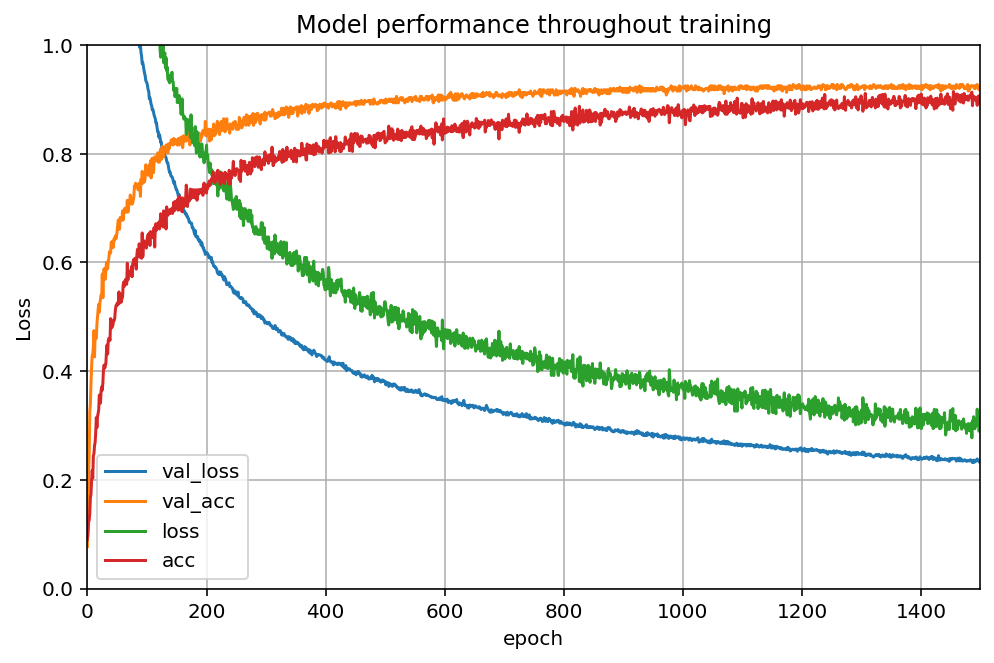

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Accuracy

In [37]:
y_train_predict = model_final.predict(new_X_train)
y_train_predict = np.argmax(y_train_predict, axis = 1)
y_train_predict =  np_utils.to_categorical(y_train_predict, num_classes=10, dtype='float32')
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9660400242571255


In [38]:
y_test_predict = model_final.predict(new_X_test)
y_test_predict = np.argmax(y_test_predict, axis = 1)
y_test_predict =  np_utils.to_categorical(y_test_predict, num_classes=10, dtype='float32')
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9225181598062954


## Prediction

In [39]:
import cv2
img2 = cv2.imread('prev2.jpg')
img2  = cv2.resize(img2,dsize=(64,64))
img2.shape

(64, 64, 3)

In [40]:
img2 = img2.reshape(1,img2.shape[0],img2.shape[1],img2.shape[2])
img2_predict0 = vggmodel.predict(img2)
img2_predict = model_final.predict(img2_predict0)

In [41]:
img2_predict = np.argmax(img2_predict, axis = 1)
img2_predict

array([8], dtype=int64)

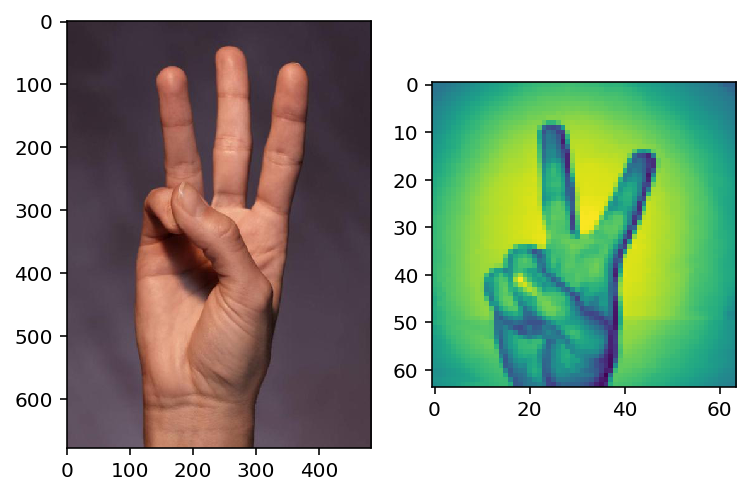

In [54]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[1].imshow(X[1817])